# INDUSTRY EQUIPMENT DEFECT DECTECION USING CNN

### Summary:
       The Industry Equipment Defect Detection using CNN project focuses on automating the identification of defects in industrial machinery and equipment through image-based analysis. Leveraging Convolutional Neural Networks (CNNs), the model is trained on labeled images of defective and non-defective parts, learning to accurately detect flaws such as cracks, rust, wear, or structural deformities. This solution aims to improve quality control by reducing human inspection errors, speeding up the defect identification process, and minimizing downtime, which ultimately enhances operational efficiency and equipment reliability in industrial settings.

### Objective: 
           Develop a machine learning model that can classify images of industrial
           equipment into two categories: 'defective' and 'non-defective'.

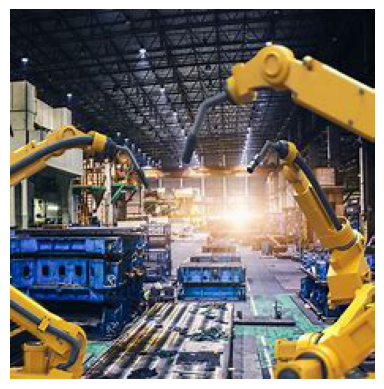

In [4]:
image = Image.open(r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\OIP.jpeg")
plt.imshow(image)
plt.axis('off')
plt.show()

### Import Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D  
from keras.layers import MaxPooling2D   
from keras.layers import Flatten        
from keras.layers import Dense
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
import shutil
from keras.models import load_model
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


import warnings 
warnings.filterwarnings("ignore")

### We only had the original data; we didn't have the train and test data, so we are creating it.

In [6]:
# Original dataset path
data_dir = r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\Industrial-Equipment"
# Target directories for train and test sets
train_dir = r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\train_data"
test_dir = r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\test_data"

# Defining subdirectories for defect and non-defect classes
os.makedirs(train_dir + '/non-defected', exist_ok=True)
os.makedirs(train_dir + '/defected', exist_ok=True)
os.makedirs(test_dir + '/non-defected', exist_ok=True)
os.makedirs(test_dir + '/defected', exist_ok=True)

In [8]:
defect_images = [os.path.join(data_dir + '/defected', img) for img in os.listdir(data_dir + '/defected')]
non_defect_images = [os.path.join(data_dir + '/non-defected', img) for img in os.listdir(data_dir + '/non-defected')]

In [10]:
# Split defect images
train_defect, test_defect = train_test_split(defect_images, test_size=0.2, random_state=42)

# Split non-defect images
train_non_defect, test_non_defect = train_test_split(non_defect_images, test_size=0.2, random_state=42)

In [12]:
# Function to copy images
def copy_images(image_list, target_dir):
    for image_path in image_list:
        shutil.copy(image_path, target_dir)

# Copy defect images
copy_images(train_defect, train_dir + '/defected')
copy_images(test_defect, test_dir + '/defected')

# Copy non-defect images
copy_images(train_non_defect, train_dir + '/non-defected')
copy_images(test_non_defect, test_dir + '/non-defected')

In [14]:
print(f"Training defect images: {len(os.listdir(train_dir + '/defected'))}")
print(f"Training non-defect images: {len(os.listdir(train_dir + '/non-defected'))}")
print(f"Testing defect images: {len(os.listdir(test_dir + '/defected'))}")
print(f"Testing non-defect images: {len(os.listdir(test_dir + '/non-defected'))}")


Training defect images: 2059
Training non-defect images: 1461
Testing defect images: 515
Testing non-defect images: 366


### Let's Starting the Building CNN Model

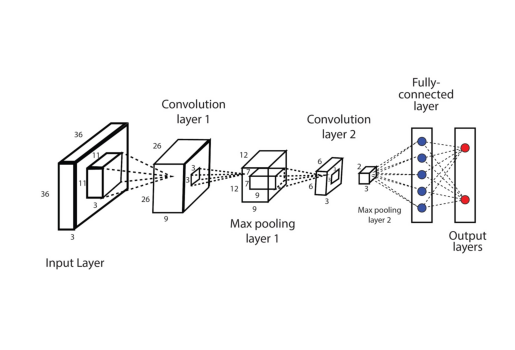

In [16]:
image2 = Image.open(r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\CNN Architecture.png")
plt.imshow(image2)
plt.axis('off')
plt.show()

In [18]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=1, activation='sigmoid')])

In [20]:
cnn_model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,027,457 (7.73 MB)

 Trainable params: 2,027,457 (7.73 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                               width_shift_range = 0.2,
                                                               height_shift_range = 0.2,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True,
                                                               fill_mode  = 'nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                               width_shift_range = 0.2,
                                                               height_shift_range = 0.2,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True,
                                                               fill_mode  = 'nearest')

training_set = train_datagen.flow_from_directory(r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\train_data",
                                                target_size = (150, 150),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary',
                                                subset='training')
test_set = test_datagen.flow_from_directory(r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\test_data",
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 3520 images belonging to 2 classes.
Found 881 images belonging to 2 classes.


In [26]:
training_set.class_indices

{'defected': 0, 'non-defected': 1}

In [28]:
result = cnn_model.fit(training_set, 
                          epochs=50,
                          verbose=1, 
                          validation_data= test_set)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.6143 - loss: 0.6861 - val_accuracy: 0.7526 - val_loss: 0.7508
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 106s 928ms/step - accuracy: 0.7895 - loss: 0.4825 - val_accuracy: 0.8388 - val_loss: 0.3784
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 103s 901ms/step - accuracy: 0.8273 - loss: 0.3985 - val_accuracy: 0.8150 - val_loss: 0.3788
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 101s 873ms/step - accuracy: 0.7972 - loss: 0.4335 - val_accuracy: 0.8207 - val_loss: 0.3740
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 102s 890ms/step - accuracy: 0.8168 - loss: 0.3915 - val_accuracy: 0.8922 - val_loss: 0.2527
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 102s 883ms/step - accuracy: 0.8495 - loss: 0.3589 - val_accuracy: 0.8400 - val_loss: 0.3752
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 101s 877ms/step - accuracy: 0.8568 - loss: 0.3221 - val_accuracy: 0.9024 - val_loss: 0.2672
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 100s 870ms/step - accuracy: 0.8865 - lo

In [30]:
cnn_model.save('Industry_Equipment_Defect_Detection.h5')

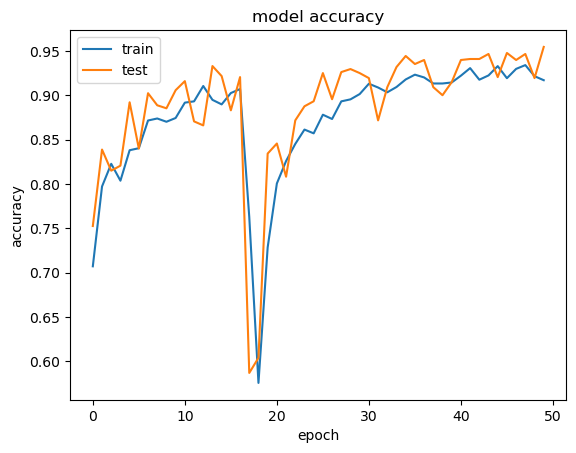

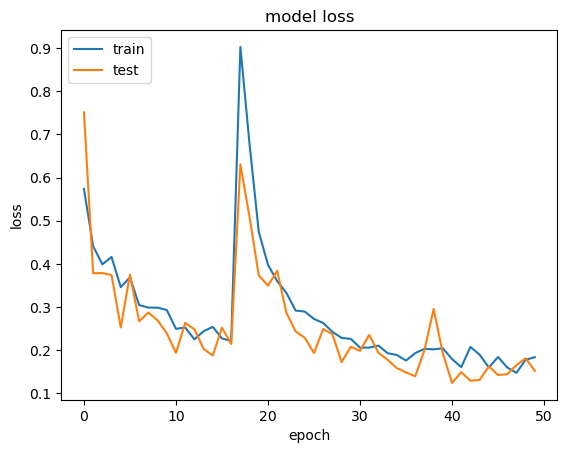

In [36]:
# ACCURACY
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# LOSS
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [144]:
from tensorflow.keras.preprocessing import image
def model_output (path):
    raw_img = image.load_img(path,target_size=(150,150))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("Non Defected")
    else:
        print("Defected")

In [146]:
os.chdir(r"C:\Users\hiten\Downloads\Python\Deep Learning\CNN\Industrial Equipment Defect Detection by using CNN\Demo")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Probability :  6.77083e-05
Defected


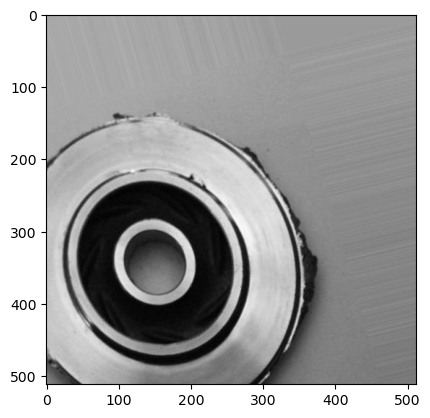

In [154]:
model_output('Demo15.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Probability :  9.101387e-07
Defected


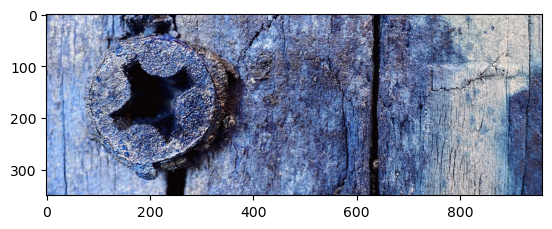

In [166]:
model_output("Demo11.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Probability :  0.9997144
Non Defected


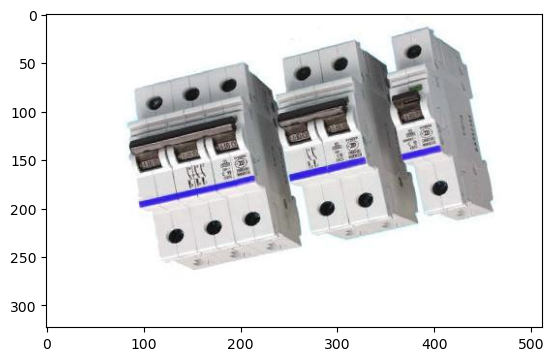

In [168]:
model_output("Demo5.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Probability :  0.99476576
Non Defected


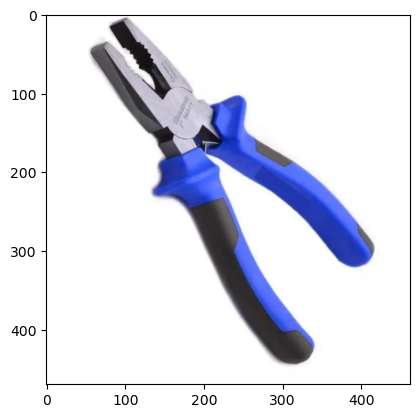

In [170]:
model_output("Demo7.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability :  0.9999981
Non Defected


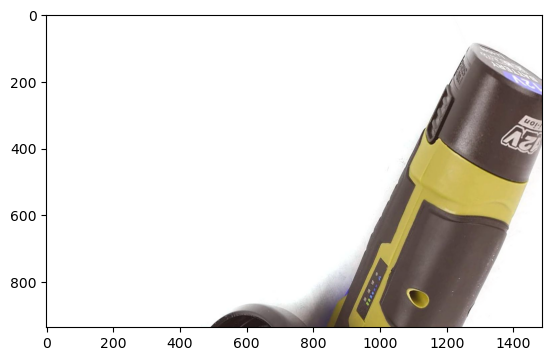

In [172]:
model_output("Demo3.JPEG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability :  0.99974054
Non Defected


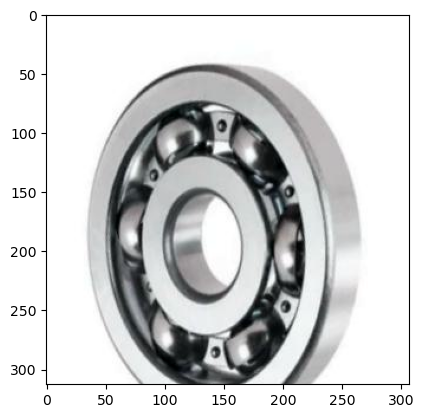

In [178]:
model_output("Demo4.JPEG")

# Finish